## Question #1 (50 points)

***This question consists of plotting and a conceptual question. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for anharmonically coupled oscillators, create a figure that superimposes

* a contour plot of the potential energy, and;
* the trajectory of $Q_1$ and $Q_2$.

### Point breakdown

* Contour plot (20 points)
* Trajectory plot (20 points)
* Physical explanation (10 points)

### The potential energy

$$ \Delta U = \frac{1}{2} K_1 Q_1^2 + \frac{1}{2} K_2 Q_2^2 + \frac{1}{3} C Q_1 Q_2^2 $$

### Constrained parameters and initial conditions

Take $K_1 = 1$, $K_2 = 0.2$, $M_1 = M_2 = 1$, and $C=0.5$. For the initial conditions, take $Q_1(0) = 0$, $Q_2(0) = 1$, and both velocities starting at zero.

### Plotting constraints
Plot $Q_1$ and $Q_2$ on the horizontal and vertical axes, respectively. I suggest a meshgrid of at least $100 \times 100$ points.

For your contour plot, combine `plt.contour` and `plt.contourf` with code similar to the following:

* `plt.contourf(Q1_grid, Q2_grid, U_grid, levels=50, cmap='viridis')`
* `plt.contour(Q1_grid, Q2_grid, U_grid, levels=50, colors='white', linewidths=1)`

Also, use `plt.xlim(-1.5, 1.5)` and `plt.ylim(-1.5, 1.5)`

Don't forget to label your axes.

### Getting and plotting the trajectory

To get the trajectory, you will need to set up and solve the equations of motion, as we did in previous homework and in class. Then you can plot $Q_2$ versus $Q_1$ with `matplotlib` using a line of code similar to `plt.plot(Q1, Q2, color='red', label="Trajectory")`.

Plot the trajectory from $t=0$ to $t=50$, with an appropriate choice of mesh points to ensure the trajectory is resolved. (e.g. `t_mesh = np.linspace(0, 50, 200)`)

### Physical explanation

With your code complete, you can test four cases for the initial conditions (all with the initial velocity set to zero):

1. $Q_1(0) = 0$, $Q_2(0) = 1$ (**submit this plot**)
2. $Q_1(0) = 0$, $Q_2(0) = -1$
3. $Q_1(0) = 1$, $Q_2(0) = 0$
4. $Q_1(0) = -1$, $Q_2(0) = 0$

Why do the dynamics differ when only $Q_1$ is initially displaced compared to when only $Q_2$ is initially displaced? How does this relate to the coupling term in the potential energy? What is the physical interpretation? You could use our cylindrical beam example from class to describe this, if you like.


In [50]:
#Imports:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


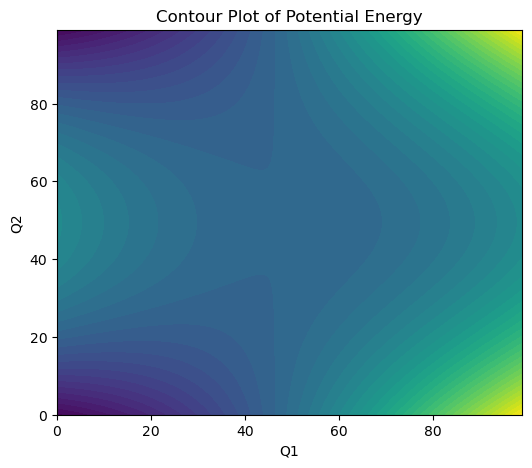

In [48]:
#Contour plot of potential energy


# Define the range; change values A/N
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100) 

# Create a grid of x and y values
Q_1, Q_2 = np.meshgrid(x, y)


# Define the function
#def potential_energy(Q_1, Q_2, K_1 =1, K_2 = 0.2, C = 0.5):
#    return 1/2 * K_1 * Q_1 **2 + 1/2 * K_2 * Q_2 **2 + 1/3 * C * Q_1 * Q_2 ** 2

U = 1/2 * 1 * Q_1 **2 + 1/2 * 0.2 * Q_2 **2 + 1/3 * 0.5 * Q_1 * Q_2 ** 2

# Display the U array to confirm the values
#print("meshgrid for Q1:\n", Q_1)
#print("meshgrid for Q2:\n", Q_2)

# Create the contour plot
plt.figure(figsize=(6, 5))
contour = plt.contourf(U, levels=50, cmap='viridis') # Use contour lines with 10 levels

#plt.colorbar(contour)  # Add a color bar
plt.title('Contour Plot of Potential Energy')
plt.xlabel('Q1')
plt.ylabel('Q2')

# Show the plot
plt.show()

In [63]:
#Trajectory of Q1 and Q2
# F_Q1 = -dQ1/dU
# F_Q2 = -dQ2/dU
# Plot F_Q1
# Overlay plot F_Q2

#Defining U:
U, K1, K2, Q1, Q2, C, F_Q1, F_Q2 = sp.symbols('U K1 K2 Q1 Q2 C F_Q1 F_Q2')

potential_energy = sp.Eq(1/2 * K1 * Q1 **2 + 1/2 * K2 * Q2 **2 + 1/3 * C * Q1 * Q2 ** 2, U)

p_energy_solution = sp.solve(potential_energy, U)
p_energy_solution
###checked^

#First deriv. of U= -F_Q = motion

force_expression_Q1 = sp.Eq(-1 * sp.diff(1/2 * K1 * Q1 **2 + 1/2 * K2 * Q2 **2 + 1/3 * C * Q1 * Q2 ** 2, Q1), F_Q1)
force_expression_Q1
###checked^

force_expression_Q2 = sp.Eq(-1 * sp.diff(1/2 * K1 * Q1 **2 + 1/2 * K2 * Q2 **2 + 1/3 * C * Q1 * Q2 ** 2, Q2), F_Q2)
force_expression_Q2
###checked^


Eq(-0.666666666666667*C*Q1*Q2 - 1.0*K2*Q2, F_Q2)

(array([-5. , -2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. ]),
 [Text(0, -5.0, '−5.0'),
  Text(0, -2.5, '−2.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0')])

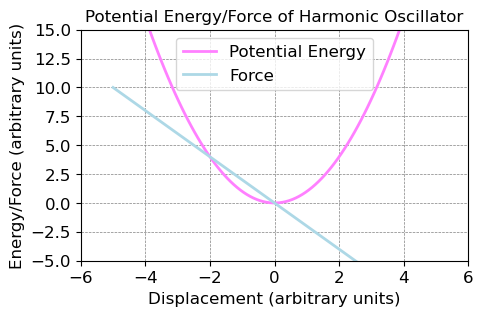

In [68]:
x = np.linspace(-5, 5, 100)

def parabola(x):
    return x**2

# Generate y-values for the parabola using the x-values from np.linspace
y_parabola = parabola(x)

# Plot the parabola using plt.plot
#plt.plot(x, y_parabola)

# Define another function (linear function for demonstration)
def linear(x):
    return - 2 * x

# Generate y-values for the linear function
y_linear = linear(x)

# Create a figure with a specific size
# Create a figure with a specific size
plt.figure(figsize=(5, 3))

# Plot the parabola with markers and customized grid
plt.plot(x, y_parabola,
         color=(1,0.5,1), # you can use RGB values for colors
         linestyle='-',
         linewidth=2,
         label='Potential Energy')

# Plot the linear function
plt.plot(x, y_linear, 
         color='lightblue',
         linestyle='-',
         linewidth=2,
         label='Force')

# Add labels and title
plt.xlabel('Displacement (arbitrary units)', fontsize=12)
plt.ylabel('Energy/Force (arbitrary units)', fontsize=12)
plt.title('Potential Energy/Force of Harmonic Oscillator', fontsize=12)

# Adjust tick mark label font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend to differentiate between the lines
plt.legend(fontsize=12)

# Add grid
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Set limits for x and y axes
plt.xlim([-6, 6])
plt.ylim([-5, 15])

# Adjust tick mark label font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
#plt.show()